### KNN (K-Nearest Neighbors Classification)

In [72]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

# Seaborn is a nice package for plotting, but you have to use pip to install
import seaborn as sns

from sklearn.neighbors import KNeighborsClassifier

#### Load in the Wisconsin breast cancer dataset. The attributes below will be the columns of the dataset.

Attribute Information: (class attribute has been moved to last column)

      Attribute                     Values
   -- -----------------------------------------
   1. Sample code number            id number
   2. Clump Thickness               1 - 10
   3. Uniformity of Cell Size       1 - 10
   4. Uniformity of Cell Shape      1 - 10
   5. Marginal Adhesion             1 - 10
   6. Single Epithelial Cell Size   1 - 10
   7. Bare Nuclei                   1 - 10
   8. Bland Chromatin               1 - 10
   9. Normal Nucleoli               1 - 10
   10. Mitoses                       1 - 10
   11. Class:                        (2 for benign, 4 for malignant)

The column names are taken from the dataset info file. Create an array
with the column names and assign them as the header when loading the
csv.

In [73]:
# TODO
names = ['sample_id','clump thikness','uniformity_size','uniformity_shape','adhesion','cell_size','bare_nuclei','bland_chromatin','normal_nucleoti','mitoses','class']
#df = pd.read_csv("../../assets/datasets/breast-cancer-wisconsin.csv",names=names)
df = pd.read_csv("../../assets/datasets/breast-cancer-wisconsin.csv",names=names,na_values=['?'])

df.head()

,sample_id,clump thikness,uniformity_size,uniformity_shape,adhesion,cell_size,bare_nuclei,bland_chromatin,normal_nucleoti,mitoses,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


The class field is coded as "2" for benign and "4" as malignant. 
- Let's recode this to a binary variable for classification, with "1" as malign and "0" as benign.

In [74]:
### TODO
conversion = {2:0,4:1}
df['class'] = [conversion[c] for c in df['class']]
df.head()

,sample_id,clump thikness,uniformity_size,uniformity_shape,adhesion,cell_size,bare_nuclei,bland_chromatin,normal_nucleoti,mitoses,class
0,1000025,5,1,1,1,2,1,3,1,1,0
1,1002945,5,4,4,5,7,10,3,2,1,0
2,1015425,3,1,1,1,2,2,3,1,1,0
3,1016277,6,8,8,1,3,4,3,7,1,0
4,1017023,4,1,1,3,2,1,3,1,1,0


Look at the data using seaborn's "pairplot" function. First put the dataset into "long" format, which seaborn requires for it's plotting functions:

In [75]:
# TODO
df.drop(labels='sample_id',inplace=True,axis=1)
df.head()

,clump thikness,uniformity_size,uniformity_shape,adhesion,cell_size,bare_nuclei,bland_chromatin,normal_nucleoti,mitoses,class
0,5,1,1,1,2,1,3,1,1,0
1,5,4,4,5,7,10,3,2,1,0
2,3,1,1,1,2,2,3,1,1,0
3,6,8,8,1,3,4,3,7,1,0
4,4,1,1,3,2,1,3,1,1,0


In [76]:
df.apply(lambda x: sum(x == "?"))

clump thikness       0
uniformity_size      0
uniformity_shape     0
adhesion             0
cell_size            0
bare_nuclei         16
bland_chromatin      0
normal_nucleoti      0
mitoses              0
class                0
dtype: int64

In [90]:
filter = df[(df['bare_nuclei'] == '?')].index.tolist()
print(filter)
df.drop(filter,inplace=True)

[23, 40, 139, 145, 158, 164, 235, 249, 275, 292, 294, 297, 315, 321, 411, 617]


In [91]:
df.shape

(683, 10)

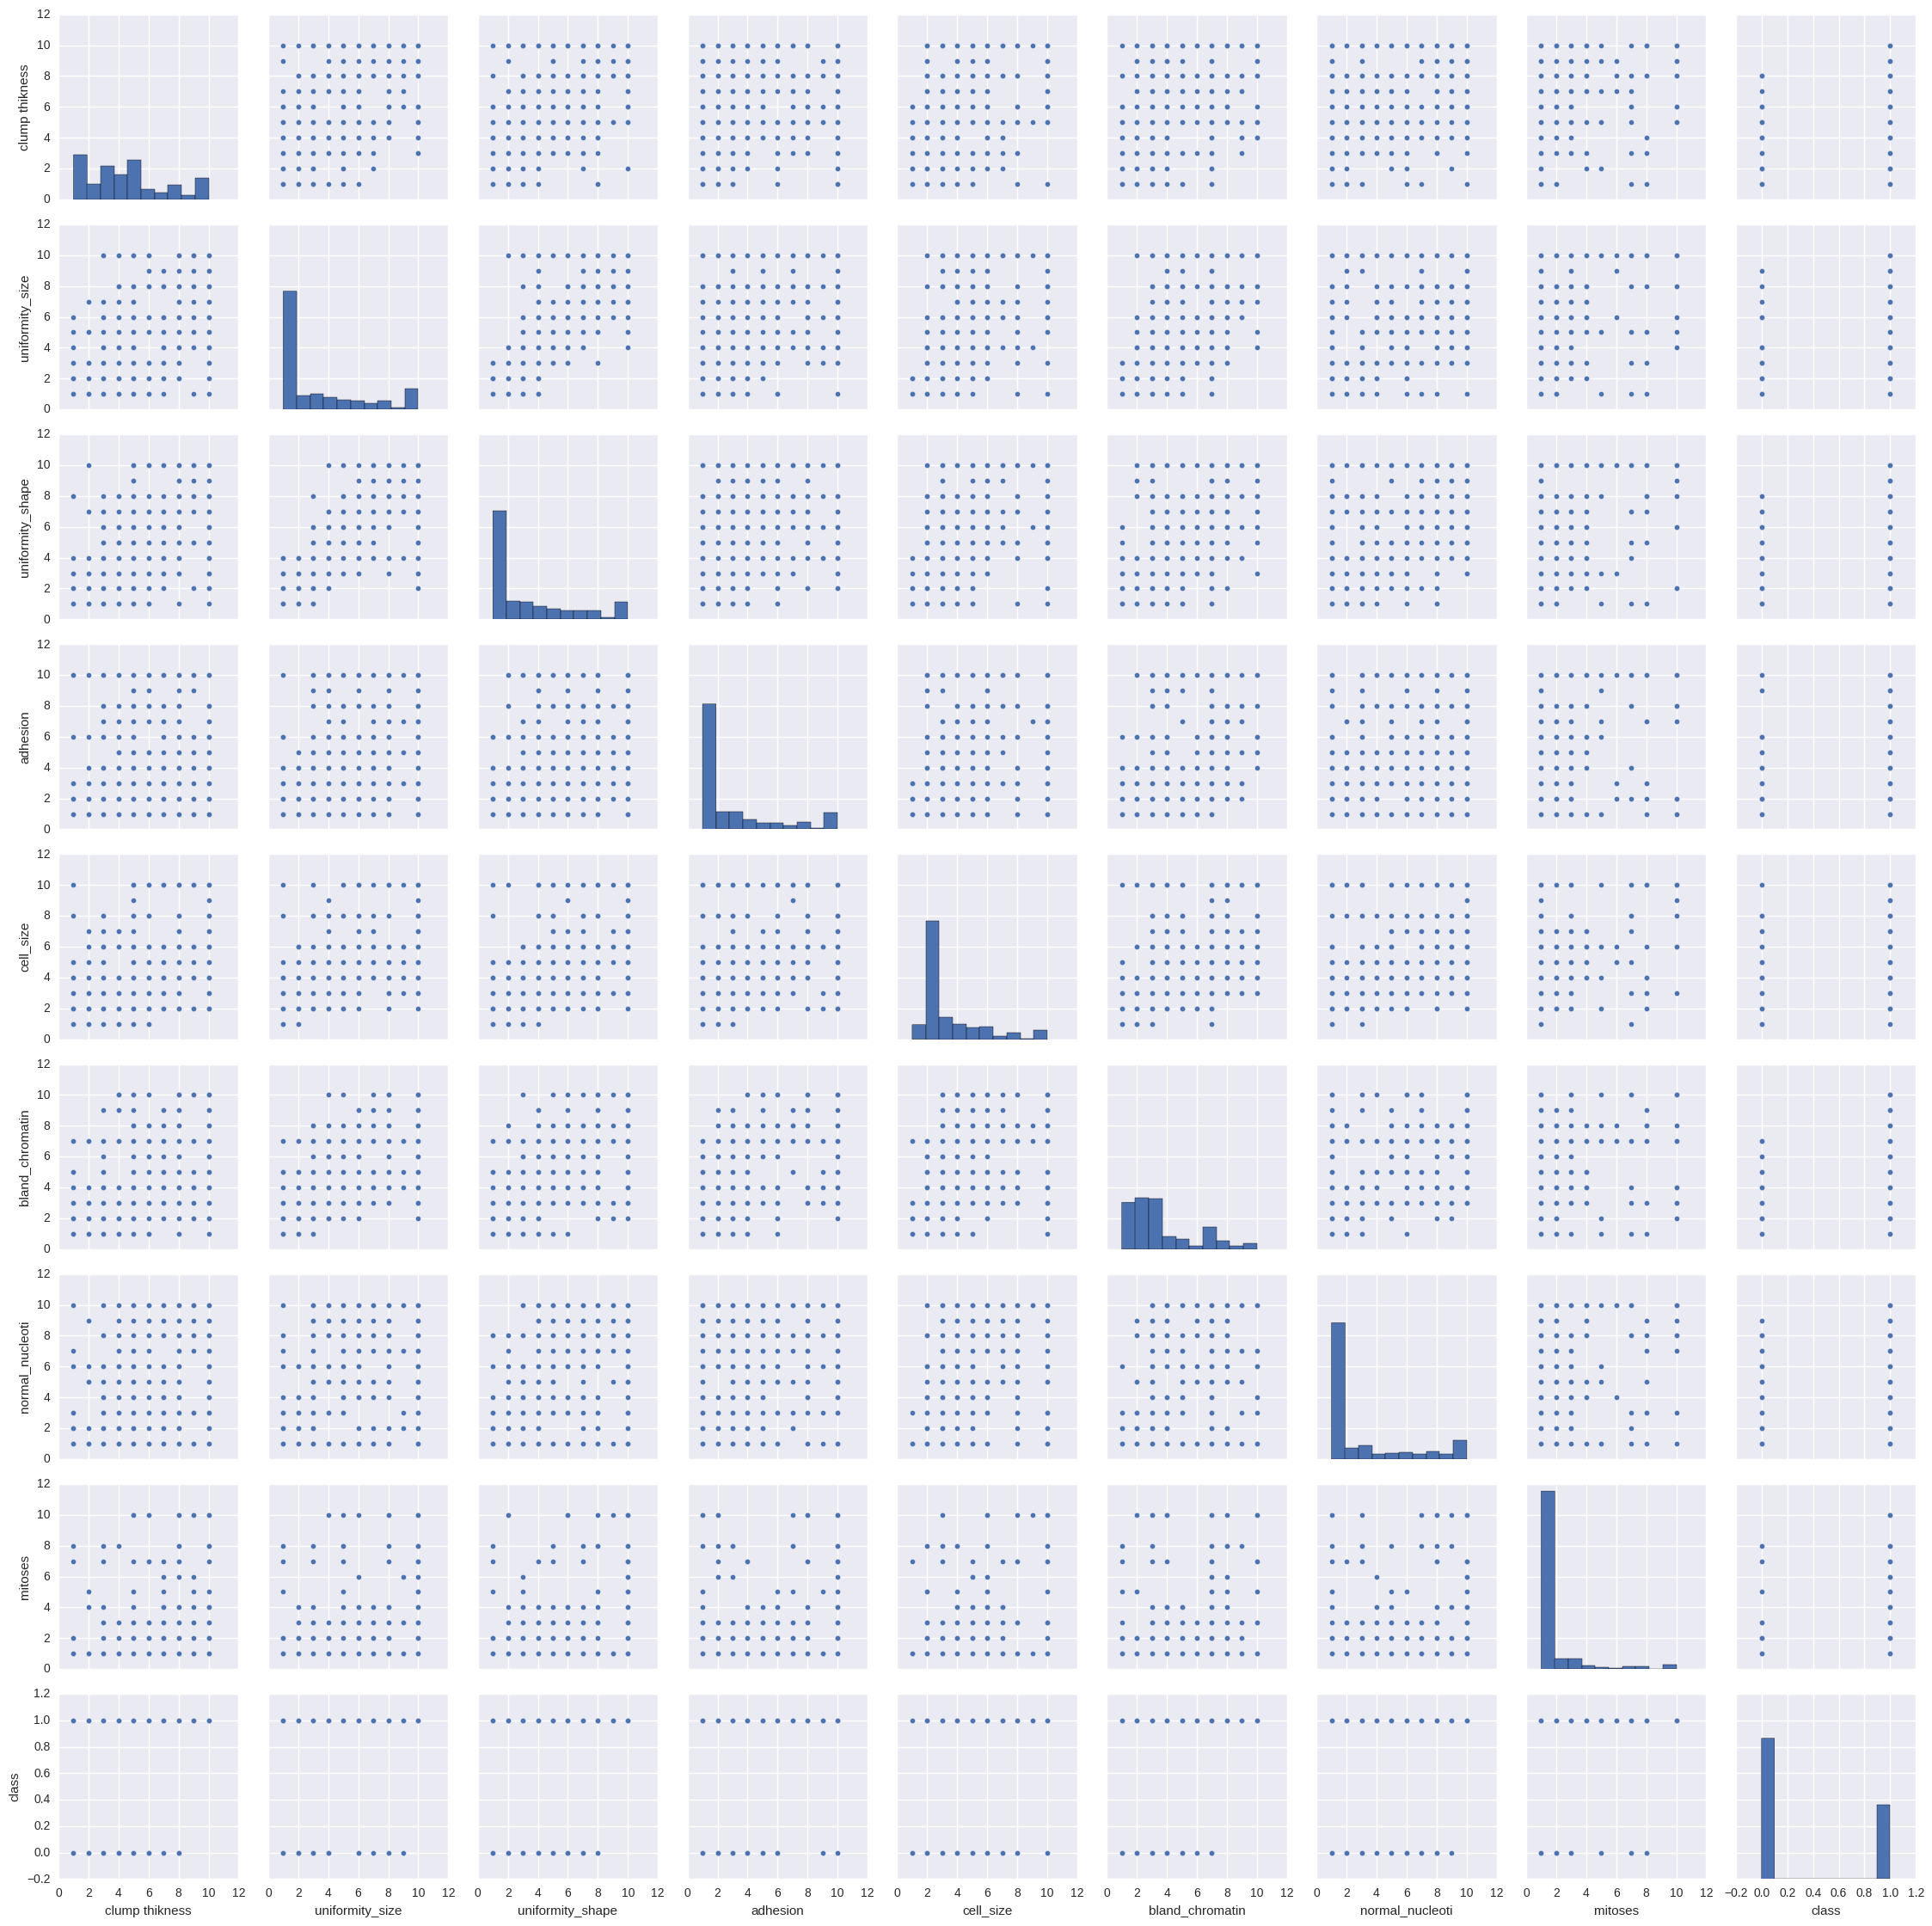

In [49]:
sns.pairplot(df)

It's very useful and recommended to look at the correlation matrix:

In [50]:
# TODO
df.corr()

,clump thikness,uniformity_size,uniformity_shape,adhesion,cell_size,bland_chromatin,normal_nucleoti,mitoses,class
clump thikness,1.000000,0.645339,0.655063,0.486691,0.522712,0.558595,0.536309,0.350319,0.717018
uniformity_size,0.645339,1.000000,0.906804,0.705424,0.752602,0.755957,0.722898,0.458753,0.818423
uniformity_shape,0.655063,0.906804,1.000000,0.682902,0.720419,0.736188,0.719459,0.438946,0.819422
adhesion,0.486691,0.705424,0.682902,1.000000,0.599030,0.667255,0.603736,0.418067,0.697963
cell_size,0.522712,0.752602,0.720419,0.599030,1.000000,0.617858,0.630761,0.480867,0.686096
bland_chromatin,0.558595,0.755957,0.736188,0.667255,0.617858,1.000000,0.665895,0.344067,0.756849
normal_nucleoti,0.536309,0.722898,0.719459,0.603736,0.630761,0.665895,1.000000,0.428106,0.712081
mitoses,0.350319,0.458753,0.438946,0.418067,0.480867,0.344067,0.428106,1.000000,0.422845
class,0.717018,0.818423,0.819422,0.697963,0.686096,0.756849,0.712081,0.422845,1.000000


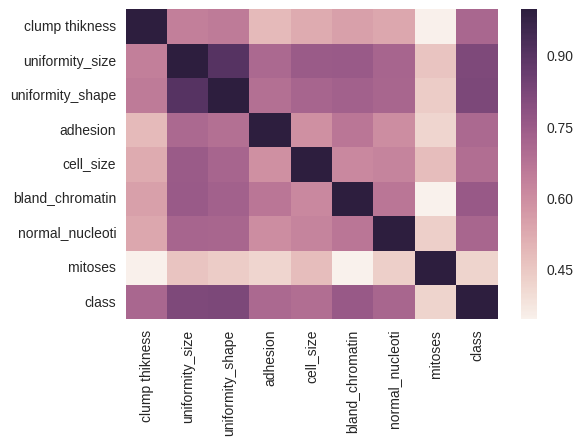

In [99]:
sns.heatmap(df.corr())

Most of these predictors are highly correlated with the "class" variable. This is already an indication that our classifier is very likely to perform well.

We can plot out in detail how the classes distribute across the variables using the very useful pairplot() function from seaborn:

In [51]:
# TODO
X = df.ix[:,-1]
X.head()

2    0
3    0
4    0
5    1
6    0
Name: class, dtype: int64

Let's see how the kNN classifier performs on the dataset (using cross-validation).

We are going to set some parameters in the classifier constructor. Some clarification below:

1. **n_neighbors** specifies how many neighbors will vote on the class
2. **weights** uniform weights indicate that all neighbors have the same weight
3. **metric** and **p** when distance is minkowski (the default) and p == 2 (the default), this is equivalent to the euclidean distance metric

Also load scikit's handy cross-validation module and perform the crossval

In [93]:
from sklearn.cross_validation import cross_val_score

y = df.ix[:,-1]
X = df.ix[:,:-1]

knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X,y)
accuracies = cross_val_score(knn, X, y, cv=5)

print("K-Fold accuracies: ",accuracies)
print("Mean accuracy:",accuracies.mean())

('K-Fold accuracies: ', array([ 0.93430657,  0.94890511,  0.98540146,  0.99270073,  0.97777778]))
('Mean accuracy:', 0.96781832927818334)


In [9]:
# TODO

- As you can see the accuracy is very high with 5 neighbors. [NOTE: ask what might be wrong with accuracy as a metric here].

- Let's see what it's like when we use only 1 neighbor:

In [95]:
# TODO
knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(X,y)
accuracies = cross_val_score(knn, X, y, cv=5)

print("K-Fold accuracies: ",accuracies)
print("Mean accuracy:",accuracies.mean())

('K-Fold accuracies: ', array([ 0.89781022,  0.94160584,  0.95620438,  0.97810219,  0.98518519]))
('Mean accuracy:', 0.95178156258448221)


- Even with 1 neighbor we do quite well at predicting the malignant observations.

- Now fit a kNN classifier with n_neighbors=5 using just 'clump thickness' and 'cell size uniformity' as variables.

- Plot the points and the colors of where the classifier decides between malignant vs. benign. The size of the circles denotes the number of observations at that point. The hue of the circle denotes the mixture of class labels between 0 and 1.

In [11]:
# TODO

In [98]:
X_ = df.ix[:,:2]

knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_,y)
accuracies = cross_val_score(knn, X_, y, cv=5)

print("K-Fold accuracies: ",accuracies)
print("Mean accuracy:",accuracies.mean())

('K-Fold accuracies: ', array([ 0.91240876,  0.94160584,  0.89781022,  0.97810219,  0.97037037]))
('Mean accuracy:', 0.9400594755339281)
